In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

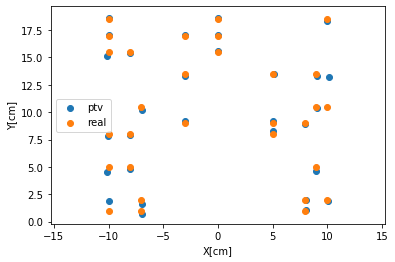

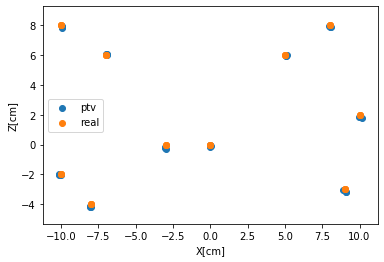

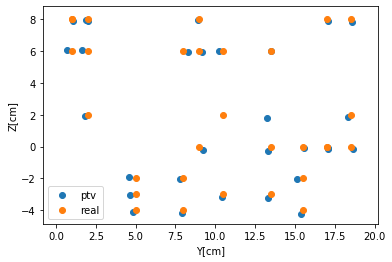

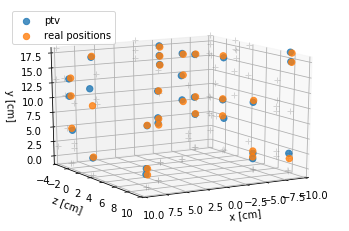

In [2]:
#print real positions of particles
real = True

#offset section FOV1
x_off = 9.8
y_off = -0.4
z_off = 0

# offset section FOV2
#x_off = 11
#y_off = -1
#z_off = 3

#Data storage, loading partcles positions
folder = 'multiplane/res/'
folder2 = 'multiplane/img/'
name = folder+'rt_is.10001'
a = np.loadtxt(name, skiprows=1)

#Separate data into coordinates, add offset  between ptv and real positions(systematic error) 
x = a[:,1]/10. + x_off
y = a[:,2]/10. + y_off
z = a[:,3]/10. + z_off

#error in measurments is interpreted by standard deviation in the z position
err = np.std(z)
sizes = np.zeros(len(a))
no_correction = np.zeros(len(a))
#first polinomial adjust the sizes from different pixel to world transform dependent on z 
p = np.poly1d(np.array([-4.328125e-04,  2.568750e-02,  5.377800]))
#second polinomial adjust for blurryness by comparing first found size with real size
resize = np.poly1d(np.array([0.05361976, 0.47352799, 0.69640069]))

for i in range(len(a)):
    #Scale pixel to world with z position
    scale = p(a[i][3]/10.) 
    #Find ID in each camera
    ID1, ID2, ID3, ID4 = int(a[i][4]),int(a[i][5]),int(a[i][6]),int(a[i][7])
    if ID1 < 0:
        C1 = np.array([np.nan,np.nan])
    else:
        c1_name = folder2 + 'cam1.10001_targets'
        C1 = np.loadtxt(c1_name,skiprows=ID1+1,usecols=(4,5),max_rows=1)
    if ID2 < 0:
        C2 = np.array([np.nan,np.nan])
    else:
        c2_name = folder2 + 'cam2.10001_targets'
        C2 = np.loadtxt(c2_name,skiprows=ID2+1,usecols=(4,5),max_rows=1)
    if ID3 < 0:
        C3 = np.array([np.nan,np.nan])
    else:
        c3_name = folder2 + 'cam3.10001_targets'
        C3 = np.loadtxt(c3_name,skiprows=ID3+1,usecols=(4,5),max_rows=1)
    if ID4 < 0:
        C4 = np.array([np.nan,np.nan])
    else:
        c4_name = folder2 + 'cam4.10001_targets'
        C4 = np.loadtxt(c4_name,skiprows=ID4+1,usecols=(4,5),max_rows=1)
    #Mean of each ellipse axis
    al = np.nanmean([C1[0],C2[0],C3[0],C4[0]])
    b = np.nanmean([C1[1],C2[1],C3[1],C4[1]])
    #D_e = srqrt(axis1*axis2)
    R = np.sqrt(al*b)
    #Second adjust for size
    no_correction[i] = R/scale 
    sizes[i] = resize(R/scale)
    

plt.figure(1)
plt.scatter(x,y,label='ptv')
plt.axis('equal')
plt.xlabel('X[cm]')
plt.ylabel('Y[cm]')

plt.figure(2)
plt.scatter(x,z,label='ptv')
plt.axis('equal')
plt.xlabel('X[cm]')
plt.ylabel('Z[cm]')
#plt.title('Standard Deviation in z=%.3f cm'%err)

plt.figure(3)
plt.scatter(y,z,label='ptv')
plt.axis('equal')
plt.xlabel('Y[cm]')
plt.ylabel('Z[cm]')

if real:
    #matrix of real positions for  three sizes of particles
    xr = np.asarray([[-10,-10,-8,-7,-3,0,5,8,9,10],
          [-10,-10,-8,-7,-3,0,5,8,9,10],
          [-10,-10,-8,-7,-3,0,5,8,9,10]])
    yr = np.asarray([[1,8,5,2,17,15.5,13.5,9,10.5,18.5],
                     [18.5,5,15.5,1,9,17,8,2,13.5,10.5],
                     [17,15.5,8,10.5,13.5,18.5,9,1,5,2]])
    zr =  np.asarray([[8,-2,-4,6,0,0,6,8,-3,2],
          [8,-2,-4,6,0,0,6,8,-3,2],
         [8,-2,-4,6,0,0,6,8,-3,2]])
    #matrix of real sizes 
    size_x = np.asarray([[5.32,5.27,5.52,5.48,5.34,5.62,5.51,5.53,5.53,5.56],
                         [3.68,3.41,3.46,3.67,3.63,3.60,3.58,3.48,3.45,3.43],
                         [2.77,2.56,2.57,2.47,2.50,2.57,2.66,2.49,2.65,2.58]])
    size_y = np.asarray([[5.46,5.52,5.43,5.39,5.59,5.40,5.17,5.23,5.27,5.44],
                         [3.72,3.64,3.67,3.76,3.73,3.92,3.81,3.88,3.42,3.84],
                         [2.52,2.63,2.41,2.74,2.61,2.63,2.59,2.68,2.64,2.46]])
    size_z = np.asarray([[4.40,4.62,4.47,4.39,4.37,4.48,4.43,4.33,4.33,4.35],
                         [3.32,3.30,3.19,3.28,3.14,3.38,3.40,3.33,3.50,3.43],
                         [2.64,2.36,2.56,2.48,2.27,2.58,2.45,2.58,2.51,2.47]])
    size_r = np.zeros((3,10))
    for i in range(3):
        for j in range(10):
            #size_r[i][j] = np.cbrt([size_x[i][j],size_y[i][j],size_z[i][j]])
            size_r[i][j] = np.cbrt(size_x[i][j]*size_y[i][j]*size_z[i][j])
    
    plt.figure(1)
    plt.scatter(xr,yr,label='real')
    plt.legend()
    
    plt.figure(2)
    plt.scatter(xr,zr,label='real')
    plt.legend()
    
    plt.figure(3)
    plt.scatter(yr,zr,label='real')
    plt.legend()
    
fig = plt.figure(4)
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, z, '+', zdir='z', zs=-1.05, c='gray',alpha=0.2)
ax.plot(z, y, '+', zdir='x', zs=-10, c='gray',alpha=0.3)
ax.plot(x, y, '+', zdir='y', zs=-4, c='gray',alpha=0.3)
ax.scatter(x, y, z, zdir='y', s=40, c='C0', alpha=0.8, label='ptv')
ax.scatter(xr, yr, zr, zdir='y', s=40, c='C1', alpha=0.8, label='real positions')


ax.set_xlim(-10,10)
ax.set_zlim(-1,18)
ax.set_ylim(-4,10)
ax.view_init(15,60)
ax.legend()
ax.set_xlabel('x [cm]')
ax.set_ylabel('z [cm]')
ax.set_zlabel('y [cm]')

plt.show()

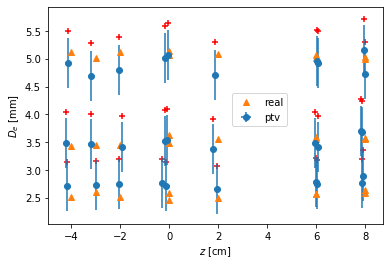

In [3]:
plt.errorbar(z,sizes,0.45,0,'o',label='ptv')
plt.plot(zr[0:1][0],size_r[0:1][0],'C1^')
plt.plot(zr[1:2][0],size_r[1:2][0],'C1^', label='real')
plt.plot(zr[2:][0],size_r[2:][0],'C1^')
plt.scatter(z,no_correction, c='r',marker='+')

#plt.ylim(3.5,5.8)
plt.legend(loc=(0.55,0.45))
plt.xlabel('$z$ [cm]')
plt.ylabel('$D_e$ [mm]')
plt.savefig('size-conf.png',dpi=300,bbox_inches='tight')

## Making of the pixel to real world coordinate scaling

In [4]:
zr[0:1]

array([[ 8, -2, -4,  6,  0,  0,  6,  8, -3,  2]])

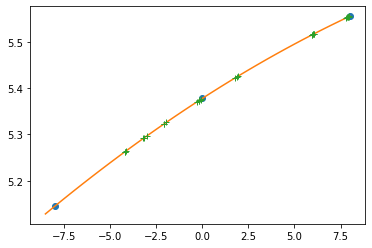

In [5]:
#Known postions of calibarion targets
zet = np.asarray([-8,0,8])
#Knonw pixel to world scale on calibration targets positions
scal = np.asarray([5.1446,5.3778,5.5556])
pol = np.polyfit(zet,scal,2)
p = np.poly1d(pol)
plt.plot(zet,scal,'o')
plt.plot(np.arange(-8.5,8.5,0.5),p(np.arange(-8.5,8.5,0.5)))
plt.plot(z,p(z),'+')

So the polinomial for scaling with z is:

In [6]:
pol

array([-4.328125e-04,  2.568750e-02,  5.377800e+00])

## Polinomial for adjust of threshold/blurryness

Text(0.5, 0, 'PTV size')

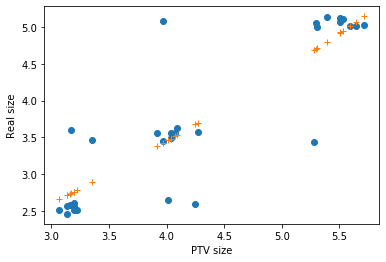

In [15]:
pol = np.polyfit(no_correction,size_r.flatten(),2)
p = np.poly1d(pol)
plt.plot(no_correction,size_r.flatten(),'o')
plt.plot(no_correction,p(no_correction),'+')
plt.ylabel('Real size')
plt.xlabel('PTV size')

So polinomial to adjsut for threshold-blurryness is:

In [11]:
pol

array([0.05361976, 0.47352799, 0.69640069])